<a href="https://colab.research.google.com/github/SLCFLAB/Fintech2025-2/blob/main/DL_day6/6_2_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Preprocessing

## 1. Tokenization (토큰화)
- 문장을 단어 또는 문자 단위로 나누는 과정
- 예제:
  - 입력: "자연어 처리는 흥미로운 분야입니다."
  - 토큰화 결과: `["자연어", "처리", "는", "흥미로운", "분야", "입니다"]`

## 2. Stopping (불필요한 단어 제거)
- 의미를 크게 갖지 않는 단어를 제거하는 과정
- 일반적으로 `a, the, is, and, 은, 는, 이, 가` 같은 불용어(stopwords)를 제거
- 예제:
  - 입력: `["자연어", "처리", "는", "흥미로운", "분야", "입니다"]`
  - Stopping 결과: `["자연어", "처리", "흥미로운", "분야"]`

## 3. Stemming (어간 추출)
- 단어의 기본 형태(어간)를 추출하는 과정
- 예제:
  - 입력: `["running", "runs", "ran"]`
  - Stemming 결과: `["run", "run", "run"]`
  - 입력: `["하다", "했다", "할 것이다"]`
  - Stemming 결과: `["하"]`

### Tokenize, Stopping, Stemming

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
!pip install gensim==4.3.2 scipy==1.10.1
from gensim.models import Word2Vec
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
# 간단한 문장 예시
sentences = [
    'This is the first sentence for word2vec. This is the second sentence. Yet another sentence. One more sentence. And the final sentence'
]

# 스테머(stemmer) 초기화
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# 토큰화, 불용어 제거, 스테밍 함수 정의
def preprocess_sentence(sentence):
    tokens = word_tokenize(sentence.lower())  # 소문자로 변환 후 토큰화
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]  # 불용어 제거 및 알파벳 문자만 선택
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]  # 스테밍 적용
    return stemmed_tokens

# 모든 문장에 대해 전처리 적용
preprocessed_sentences = [preprocess_sentence(sentence) for sentence in sentences]

print(preprocessed_sentences)

[['first', 'sentenc', 'second', 'sentenc', 'yet', 'anoth', 'sentenc', 'one', 'sentenc', 'final', 'sentenc']]


이렇게 전처리 한 후 어떻게 해야할까?
> Word Embedding(단어를 벡터화 하는 것)
- Bag of Words
- Word2Vec

http://w.elnn.kr/search/ 단어간의 유사도 측정

단어를 벡터로 바꿔서 단어간의 연산이 가능하도록 만들었다: 비슷한 위치의 단어는 비슷한 의미를 가진다

In [3]:
from gensim.models import Word2Vec

In [4]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]
# train model
# 문장을 이용하여 단어와 벡터를 생성한다.
model = Word2Vec(sentences, min_count=1) #min count: 빈도 작은 것은 학습하지 않기 위해서
# summarize the loaded model
print(model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>


In [5]:
# 단어벡터를 구하고, 단어간 유사도를 확인하다
model_result = model.wv.most_similar("this")
print(model_result)

[('one', 0.1991206258535385), ('word2vec', 0.17272792756557465), ('final', 0.17018885910511017), ('yet', 0.14595040678977966), ('and', 0.06408977508544922), ('second', 0.04652617871761322), ('another', -0.002754019573330879), ('is', -0.013514922931790352), ('the', -0.023671654984354973), ('more', -0.032843172550201416)]


In [6]:
model.wv.most_similar("this")

[('one', 0.1991206258535385),
 ('word2vec', 0.17272792756557465),
 ('final', 0.17018885910511017),
 ('yet', 0.14595040678977966),
 ('and', 0.06408977508544922),
 ('second', 0.04652617871761322),
 ('another', -0.002754019573330879),
 ('is', -0.013514922931790352),
 ('the', -0.023671654984354973),
 ('more', -0.032843172550201416)]

In [7]:
model.wv.similarity(w1='first', w2='second')

-0.07639001

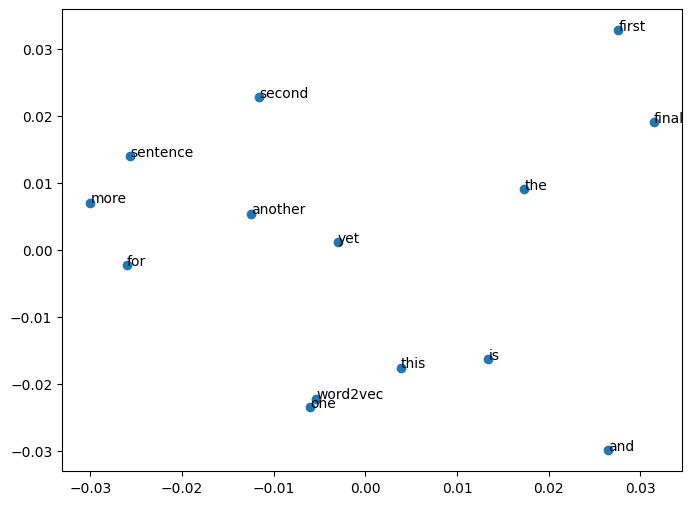

In [8]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그린다
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8 ,6))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))


# 단어벡터를 구한다.
word_vectors = model.wv
vocabs = word_vectors.key_to_index
word_vectors_list = [word_vectors[v] for v in vocabs]


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

plot_2d_graph(vocabs, xs, ys)

# Word Embedding Comparison

## 1. Word2Vec
- 학습 방법: 예측 기반 (CBOW, Skip-gram)
- 특징: 단어의 문맥을 고려하여 벡터를 학습
- 장점: 단어 간 유사성을 잘 반영함
- 단점: 미등록 단어(OOV, Out-Of-Vocabulary)에 취약함

## 2. FastText
- 학습 방법: 단어를 n-gram으로 분할하여 벡터를 학습
- 특징: 부분 단어(subword) 정보를 활용하여 벡터 생성
- 장점: OOV 문제를 해결할 수 있음
- 단점: 모델 크기가 커질 수 있음

## 3. GloVe
- 학습 방법: 통계적 기법(Co-occurrence Matrix) 활용
- 특징: 전역적인 단어 간 관계를 학습하여 벡터화
- 장점: 전체 문맥을 반영하여 의미적 유사성이 강함
- 단점: 특정 문맥에서 단어의 다의성을 반영하기 어려움

## 3가지 embedding 방식 간 비교
| Model | Training Method | OOV Handling | Strengths | Weaknesses |
|--------|----------------|--------------|------------|------------|
| Word2Vec | Predictive (CBOW, Skip-gram) | No | Context-aware representations | Cannot handle unseen words |
| FastText | Predictive with subwords | Yes | Handles OOV well | Large model size |
| GloVe | Co-occurrence matrix | No | Strong semantic relationships | Limited for polysemy |

In [9]:
import nltk
from nltk.corpus import movie_reviews
#!pip install gensim==4.3.0
from gensim.models import FastText
import gensim.downloader as api

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [10]:
nltk.download('movie_reviews')
sentences = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


- **`sentences`**: 학습할 문장 리스트 (예: `[['this', 'is', 'a', 'sentence'], ...]`)
- **`vector_size=100`**: 단어 벡터 차원 수 (값이 클수록 정교하지만 메모리 사용 증가)
- **`window=5`**: 중심 단어 기준 고려할 주변 단어 범위 (값이 크면 문맥 이해↑)
- **`min_count=2`**: 최소 등장 횟수가 2 미만인 단어 무시 (희귀 단어 제거)
- **`workers=4`**: 병렬처리에 사용할 CPU 코어 수 (높을수록 학습 속도 증가)

In [11]:
# Word2Vec 모델 학습
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
word2vec_model.save("word2vec.model")

In [12]:
# FastText 모델 학습
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=2, workers=4)
fasttext_model.save("fasttext.model")

- **Global Vectors for Word Representation**
- 단어 간 **공존 확률(Co-occurrence Probability)**을 활용해 벡터화한 모델.
- 사전 훈련(pre-trained)된 벡터를 활용하면 **학습 없이 바로 단어 의미를 분석**할 수 있음.
  - `"glove-wiki-gigaword-100"`: Wikipedia + Gigaword 데이터셋으로 학습된 GloVe 벡터(100차원).

In [13]:
# GloVe 벡터 불러오기 (사전 훈련된 모델 사용)
glove_vectors = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [14]:
example_word = "good"
print("Word2Vec: ", word2vec_model.wv.most_similar(example_word))
print("FastText: ", fasttext_model.wv.most_similar(example_word))
print("GloVe: ", glove_vectors.most_similar(example_word))

Word2Vec:  [('bad', 0.849407434463501), ('nice', 0.8277002573013306), ('funny', 0.8169925212860107), ('great', 0.7821817994117737), ('fun', 0.7392894625663757), ('decent', 0.7389002442359924), ('cool', 0.7250506281852722), ('indeed', 0.7139698266983032), ('fine', 0.7033796906471252), ('perfect', 0.6926125884056091)]
FastText:  [('osgood', 0.9767061471939087), ('goodbye', 0.9617891311645508), ('goody', 0.945030689239502), ('goode', 0.9416468143463135), ('goofs', 0.9384687542915344), ('goofy', 0.9318294525146484), ('goodboy', 0.9212548136711121), ('bad', 0.9147061705589294), ('thurgood', 0.9140914678573608), ('goo', 0.9089885354042053)]
GloVe:  [('better', 0.893191397190094), ('sure', 0.8314563035964966), ('really', 0.8297762274742126), ('kind', 0.8288268446922302), ('very', 0.8260800242424011), ('we', 0.8234355449676514), ('way', 0.8215398192405701), ('think', 0.8205099105834961), ('thing', 0.8171301484107971), ("'re", 0.8141680955886841)]


## Visualization

In [15]:
example_words = ["good", "bad", "happy", "sad", "movie", "film", "actor", "actress"]

In [16]:
def plot_embeddings(model, words, title):
    vectors = [model.wv[word] for word in words if word in model.wv]
    word_labels = [word for word in words if word in model.wv]

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(8,6))
    plt.scatter(reduced[:,0], reduced[:,1], edgecolors='k', c='blue')
    for word, (x, y) in zip(word_labels, reduced):
        plt.text(x + 0.05, y + 0.05, word, fontsize=12)

    plt.title(title)
    plt.show()

# GloVe 시각화
def plot_glove_embeddings(model, words, title):
    vectors = [model[word] for word in words if word in model]
    word_labels = [word for word in words if word in model]

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(8,6))
    plt.scatter(reduced[:,0], reduced[:,1], edgecolors='k', c='blue')
    for word, (x, y) in zip(word_labels, reduced):
        plt.text(x + 0.05, y + 0.05, word, fontsize=12)

    plt.title(title)
    plt.show()

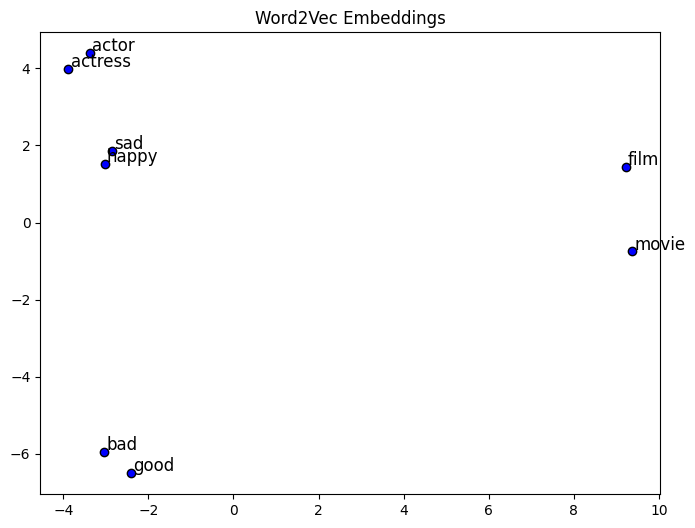

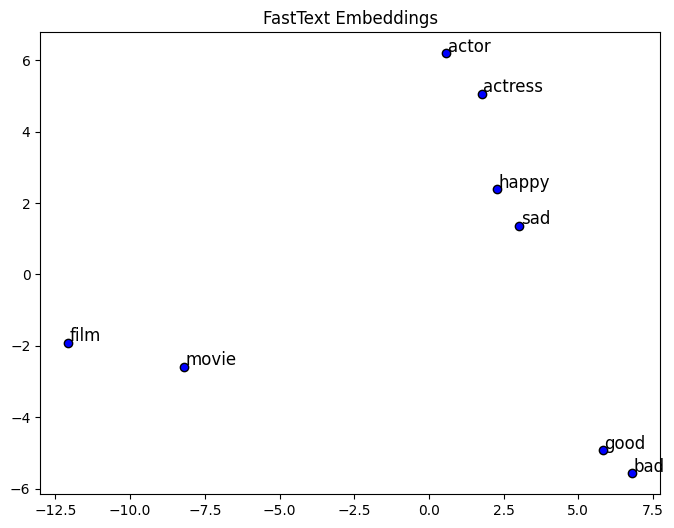

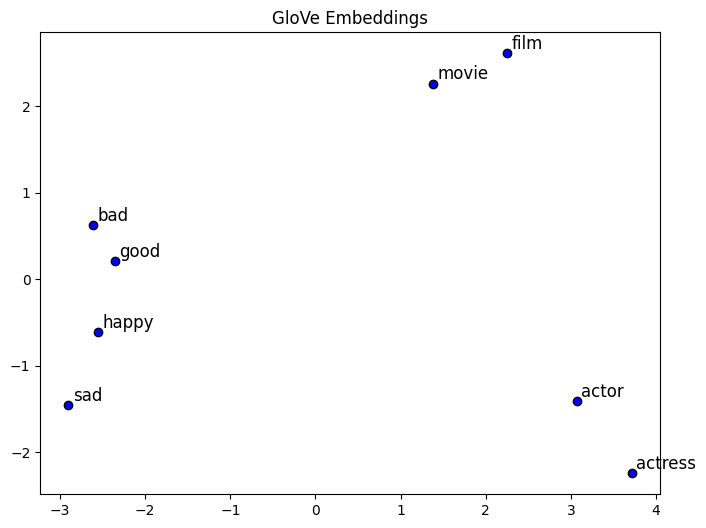

In [17]:
plot_embeddings(word2vec_model, example_words, "Word2Vec Embeddings")
plot_embeddings(fasttext_model, example_words, "FastText Embeddings")
plot_glove_embeddings(glove_vectors, example_words, "GloVe Embeddings")